In [ ]:
!pip install -U plotly

     |████████████████████████████████| 27.7 MB 1.6 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [ ]:
!pip install git+https://github.com/Joeclinton1/google-images-download.git

  Cloning https://github.com/Joeclinton1/google-images-download.git to /tmp/pip-req-build-bh3r38lz
  Running command git clone -q https://github.com/Joeclinton1/google-images-download.git /tmp/pip-req-build-bh3r38lz
     |████████████████████████████████| 958 kB 5.4 MB/s 
     |████████████████████████████████| 356 kB 43.4 MB/s 
     |████████████████████████████████| 138 kB 45.7 MB/s 
     |████████████████████████████████| 55 kB 4.2 MB/s 
     |████████████████████████████████| 3.6 MB 40.8 MB/s 
     |████████████████████████████████| 58 kB 6.0 MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=15970 sha256=671104d4a5bcd416ae901f09c7d482c243769d85c016ca07f2be89fa9073cd30
  Stored in directory: /tmp/pip-ephem-wheel-cache-1st1bo1v/wheels/79/5c/d2/2569a4f55ff29b3c4d6b1114d5110a70a79afbf381e6eb3e87
Successfully built google-images-download
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uni

In [ ]:
# importando librerías
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, random_split
import numpy as np
import plotly.express as px
import time
import copy

In [ ]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords":"face with mask,faces",
             "limit":100,"print_urls":False}
paths = response.download(arguments)

print(paths)


Item no.: 1 --> Item name = face with mask
Evaluating...
Starting Download...
Completed Image ====> 1.proper-mask-wearing.ashx.jpg
Completed Image ====> 2.honorhealth-mask-wearer.jpg
Completed Image ====> 3.istock-182423254-830x425.jpg
Completed Image ====> 4.carithers-pediatrics_face-mask-facts-for-kids.jpeg
Completed Image ====> 5.everlane-face-masks-5-pack.png
Completed Image ====> 6.burberry-face-masks-coronavirus-pandemic-fashion-design-ppe_dezeen_2364_sq.jpg
Completed Image ====> 7.young-girl-with-hand-made-face-mask.jpg
Completed Image ====> 8.5cbe569c-e1ea-4766-8702-5011b098bd7d-mask-hero.jpg
Completed Image ====> 9.most-comfortable-face-masks.png
Completed Image ====> 10.imageservice.jpg
Completed Image ====> 11.facebracket-1252473589-770x553-1.jpg
Completed Image ====> 12.woman-face-mask.jpg
Completed Image ====> 13.file-20200519-152327-1dts6e7.jpg
Completed Image ====> 14.doublerow.png
Completed Image ====> 15.00well-mask-too-low-mobilemasterat3x-v2.png
Completed Image ====

In [ ]:
# Definiendo el dataset
dataset = datasets.ImageFolder('downloads',
                              transform=transforms.Compose([
                                  #transforms.RandomResizedCrop(224),
                                  transforms.Resize(255),
                                  transforms.CenterCrop(224),
                                  transforms.ToTensor(),
                                  transforms.Normalize([0.485, 0.456, 0.406],
                                                        [0.229, 0.224, 0.225])
                                  ]))

class_names = dataset.classes
print(class_names)

['face with mask', 'faces']


In [ ]:
!zip -r "/content/downloads.zip" "/content/downloads"

updating: content/downloads/ (stored 0%)
  adding: content/downloads/faces/ (stored 0%)
  adding: content/downloads/faces/88.monsieur_sarazin.jpg (deflated 12%)
  adding: content/downloads/faces/90.marcus-outdoors.jpg (deflated 1%)
  adding: content/downloads/faces/96.human-male-different-face-parts_shutterstock_75457102-1068x601.jpg (deflated 1%)
  adding: content/downloads/faces/12.maxresdefault.jpg (deflated 4%)
  adding: content/downloads/faces/1.photo-1597223557154-721c1cecc4b0.jpg (deflated 0%)
  adding: content/downloads/faces/47.5caf0a9d6f02161b2f05aaa4.jpg (deflated 2%)
  adding: content/downloads/faces/24.fake_ai_faces.png (deflated 0%)
  adding: content/downloads/faces/28.614a2abcc3663.image.jpg (deflated 0%)
  adding: content/downloads/faces/43.3333.jpg (deflated 1%)
  adding: content/downloads/faces/41.46939219a632dff85f48387b3ea4afb4.jpg (deflated 1%)
  adding: content/downloads/faces/97.3-faces-still-3_wide-397f333858ff7da03b0f69852bd027e0825c84d3-s1100-c50.jpeg (deflate

In [ ]:
imagen,clase=dataset[120]
print(imagen.shape, '\n',clase)

torch.Size([3, 224, 224]) 
 1


In [ ]:
# Particionamos en subconjuntos de entrenamiento y prueba
n_test = int(len(dataset) * 0.2)
n_train = len(dataset) - n_test

train_dataset, test_dataset = random_split(dataset, [n_train, n_test])

print(f'n_train={len(train_dataset)}')
print(f'n_test={len(test_dataset)}')

n_train=153
n_test=38


In [ ]:
# Particionamos los subconjuntos en minibatches
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=True)


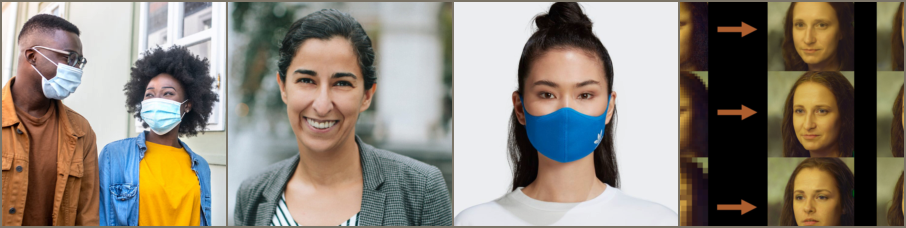

In [ ]:
# Mostramos algunos ejemplos
def imshow(inp, title = None):
  inp = inp.numpy().transpose((1, 2, 0))
  mean = np.array([0.485, 0.456, 0.406])
  std = np.array([0.229, 0.224, 0.225])
  inp = std * inp + mean
  inp = np.clip(inp, 0, 1)
  fig = px.imshow(inp, title=title)
  fig.update_layout(title_x=.5)
  fig.show()

inputs, classes = next(iter(train_loader))
out = torchvision.utils.make_grid(inputs)

imshow(out, title=', '.join(str(class_names[x]) for x in classes))

# Nueva sección

In [ ]:
# Función de entrenamiento y validación
def train_model(model, criterion, optimizer, scheduler, num_epochs = 25):
  since = time.time()
  
  best_model_wts = copy.deepcopy(model.state_dict())
  best_acc = 0.0

  rs = '------------------------------------------------------------------'
  print('Epoch    Train-Loss   Train-Acc   Val-Loss    Val-Acc   Best')
  print(rs)
  
  for epoch in range(num_epochs):
    
    # Entrenamiento
    model.train()
    
    running_loss = 0.0
    running_corrects = 0.0
    
    for inputs, labels in train_loader:
      inputs = inputs.to(device)
      labels = labels.to(device)
      
      outputs = model(inputs)
      _, preds = torch.max(outputs, 1)
      loss = criterion(outputs, labels)
        
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      
      running_loss += loss.item() * inputs.size(0)
      running_corrects += torch.sum(preds == labels.data)
    
    result = {}
    result['train_loss'] = running_loss /len(train_dataset)
    result['train_acc'] = running_corrects.double() / len(train_dataset)

    scheduler.step()
    
    # Validación 
    model.eval()
    running_loss = 0.0
    running_corrects = 0.0
    
    for inputs, labels in test_loader:
      inputs = inputs.to(device)
      labels = labels.to(device)
        
      with torch.set_grad_enabled(False):
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
          
      running_loss += loss.item() * inputs.size(0)
      running_corrects += torch.sum(preds == labels.data)
     
    result['val_loss'] = running_loss /len(test_dataset)
    result['val_acc'] = running_corrects.double() / len(test_dataset)
    epoch_acc = result['val_acc']
      
    st = '          '
    if epoch_acc > best_acc:
      best_acc = epoch_acc
      best_model_wts = copy.deepcopy(model.state_dict())
      st = '   ***    '
        
    print("%5d %11.4f %11.4f %11.4f %11.4f %s" % (epoch, result['train_loss'], result['train_acc'], result['val_acc'], result['val_acc'], st))

  print(rs)
  time_elapsed = time.time() - since
  print(f'Training complete in {time_elapsed//60:.0f}m {time_elapsed % 60:.0f}s')
  print(f'Best val accucary: {best_acc:.4f}')

  model.load_state_dict(best_model_wts)
  return model

In [ ]:
# Definimos el modelo
ft_model = models.resnet18(pretrained=True)
print(ft_model)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# Modificamos la última capa y entrenamos
device = ('cuda' if torch.cuda.is_available() else 'cpu')

ft_model.fc = nn.Linear(512, 2)
ft_model = ft_model.to(device)

ft_criterion = nn.CrossEntropyLoss()
ft_optimizer = torch.optim.SGD(ft_model.parameters(), lr=0.001, momentum=0.9)
ft_scheduler = torch.optim.lr_scheduler.StepLR(ft_optimizer, step_size=7, gamma=0.1)

ft_model = train_model(ft_model, ft_criterion, ft_optimizer, ft_scheduler, num_epochs=25)

Epoch    Train-Loss   Train-Acc   Val-Loss    Val-Acc   Best
------------------------------------------------------------------
    0      0.4870      0.7582      0.9211      0.9211    ***    
    1      0.2671      0.8758      0.9737      0.9737    ***    
    2      0.3375      0.8693      1.0000      1.0000    ***    
    3      0.1880      0.9281      1.0000      1.0000           
    4      0.2683      0.9216      1.0000      1.0000           
    5      0.2119      0.9216      1.0000      1.0000           
    6      0.2377      0.9085      0.9737      0.9737           
    7      0.3208      0.9020      0.9211      0.9211           
    8      0.2215      0.9216      0.9737      0.9737           
    9      0.3142      0.8758      1.0000      1.0000           
   10      0.2573      0.8889      0.9474      0.9474           
   11      0.0836      0.9673      0.9737      0.9737           
   12      0.0944      0.9542      0.9737      0.9737           
   13      0.1309      0.95


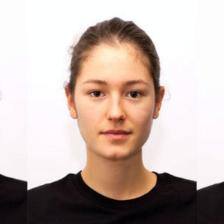


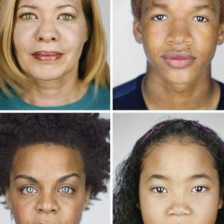


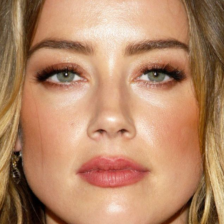


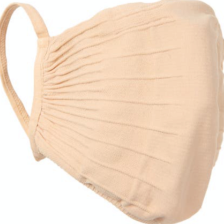


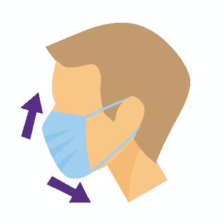


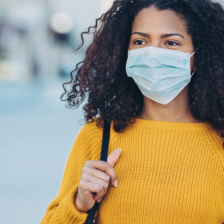


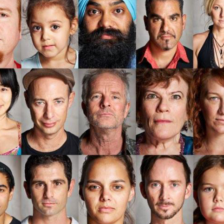


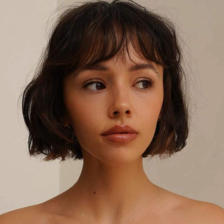

In [ ]:
# Mostramos las predicciones
def visualize_model(model, num_images = 8):
  was_training = model.training
  model.eval()
  images_so_far = 0
  
  with torch.no_grad():
    for i, (inputs, labels) in enumerate(test_loader):
      inputs = inputs.to(device)
      labels = labels.to(device)
      
      outputs = model(inputs)
      _, preds = torch.max(outputs, 1)
      
      for j in range(inputs.size()[0]):
        images_so_far += 1
        imshow(inputs.cpu().data[j], f'predicted: {class_names[preds[j]]}')
        
        if images_so_far == num_images:
          model.train(mode=was_training)
          return
    model.train(mode = was_training)

visualize_model(ft_model)

# Tratamiento Data Set para usar Faster-RCNN 

In [ ]:
!pip install "opencv-python-headless<4.3"

In [ ]:
#Dataset for read only
import os
from xml.etree import ElementTree as et
#Data processing and data visualization with bounding boxes
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
#Global used to return all file paths with speicifc pattern
import glob
#Linear Algebra
import numpy as np # linear algebra
#Parsing HTML and XML Documents (We use the XML docs)
from bs4 import BeautifulSoup
#Model
import torchvision
from torchvision import transforms, datasets, models
import torch
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from PIL import Image
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
#import albumentations as A
#from albumentations.pytorch.transforms import ToTensorV2
import cv2

In [ ]:
images_dir = '../content/face_detec_dataset/images/'
annotations_dir = '../content/face_detec_dataset/annotations/'

In [ ]:
class FaceMaskDataset(torch.utils.data.Dataset):
    
    def __init__(self, images_dir, annotation_dir,width, height, transforms=None):
        self.transforms = transforms
        self.images_dir = images_dir
        self.annotation_dir = annotation_dir
        self.height = height
        self.width = width
        
        # Sorting images and checking extension filename is checked to be jpg
        self.imgs = [image for image in sorted(os.listdir(images_dir))]
        self.annotate = [image for image in sorted(os.listdir(annotation_dir))]
        
        # Classes divided into 4 with background labeled 0
        self.classes = [_, 'without_mask','with_mask','mask_weared_incorrect']

    def __getitem__(self, idx):

        img_name = self.imgs[idx]
        image_path = os.path.join(self.images_dir, img_name)

        # Reading the images    
        img = cv2.imread(image_path)
        
        # Converting size and color
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
        img_res = cv2.resize(img_rgb, (self.width, self.height), cv2.INTER_AREA)
        
        # Image Normalization
        img_res /= 255.0
        
        # Annotate files
        annot_filename = self.annotate[idx]
        annot_file_path = os.path.join(self.annotation_dir, annot_filename)
        
        boxes = []
        labels = []
        tree = et.parse(annot_file_path)
        root = tree.getroot()
        
        # CV2 shaping height and width sizes
        wt = img.shape[1]
        ht = img.shape[0]
        
        # Bounding box coordinates for XML files
        for member in root.findall('object'):
            labels.append(self.classes.index(member.find('name').text))
            
            # bounding box
            xmin = int(member.find('bndbox').find('xmin').text)
            xmax = int(member.find('bndbox').find('xmax').text)
            
            ymin = int(member.find('bndbox').find('ymin').text)
            ymax = int(member.find('bndbox').find('ymax').text)
            
            # Corrected for image size given
            xmin_corr = (xmin/wt)*self.width
            xmax_corr = (xmax/wt)*self.width
            ymin_corr = (ymin/ht)*self.height
            ymax_corr = (ymax/ht)*self.height
            
            boxes.append([xmin_corr, ymin_corr, xmax_corr, ymax_corr])
        
        # Convert boxes into a torch.Tensor
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        
        # Getting the areas of the boxes
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])

        # Suppose all instances are not crowd
        iscrowd = torch.zeros((boxes.shape[0],), dtype=torch.int64)
        
        labels = torch.as_tensor(labels, dtype=torch.int64)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["area"] = area
        target["iscrowd"] = iscrowd
        
        image_id = torch.tensor([idx])
        target["image_id"] = image_id

        if self.transforms:
            
            sample = self.transforms(image = img_res, 
                                     bboxes = target['boxes'],
                                     labels = labels)
            
            img_res = sample['image']
            target['boxes'] = torch.Tensor(sample['bboxes'])
            
        return img_res, target

    def __len__(self):
        return len(self.imgs)

In [ ]:
# Checking dataset
dataset = FaceMaskDataset(images_dir, annotations_dir, 224, 224)
print('length of dataset = ', len(dataset), '\n')

# Testing image shape
img, target = dataset[78]
print('Image shape = ', img.shape, '\n','Target - ', target)

length of dataset =  852 

Image shape =  (224, 224, 3) 
 Target -  {'boxes': tensor([[ 22.4000,  73.6711,  34.7200,  89.6000],
        [ 19.6000, 115.4844,  28.5600, 132.4089],
        [ 47.6000,  78.6489,  54.3200,  89.6000],
        [ 94.6400,  65.7067, 160.7200, 187.1644],
        [203.2800,  50.7733, 215.0400,  80.6400]]), 'labels': tensor([1, 2, 2, 2, 1]), 'area': tensor([ 196.2439,  151.6430,   73.5915, 8025.9302,  351.2318]), 'iscrowd': tensor([0, 0, 0, 0, 0]), 'image_id': tensor([78])}


In [ ]:
#Visualizing bounding box
def plot_img_bbox(img, target):
    # plot the image and bboxes
    # Bounding boxes are defined as follows: x-min y-min width height
    fig, a = plt.subplots(1,1)
    fig.set_size_inches(5,5)
    a.imshow(img)
#    a.imshow(img, cmap='gray')
    for box in (target['boxes']):
        x, y, width, height  = box[0], box[1], box[2]-box[0], box[3]-box[1]
        rect = patches.Rectangle((x, y),
                                 width, height,
                                 linewidth = 2,
                                 edgecolor = 'r',
                                 facecolor = 'none')

        # Drawing the bounding box on images
        a.add_patch(rect)
    plt.show()

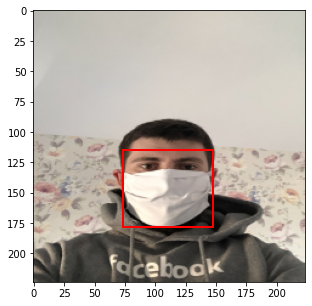

In [ ]:
# Plotting bounding box on the images
img, target = dataset[100]
plot_img_bbox(img, target)

# **RESNET50 // DETECCION y Entrenamiento **

In [ ]:
!pip install -q -U albumentations

In [ ]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

In [ ]:
def get_transform(train):
    
    if train:
        return A.Compose([
                          A.HorizontalFlip(0.5),
                            ToTensorV2(p=1.0) 
                        ], bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']})
    else:
        return A.Compose([
                            ToTensorV2(p=1.0)
                        ], bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']})

In [ ]:
def collate_fn(batch):
    return tuple(zip(*batch))

In [ ]:
# use our dataset and defined transformations
dataset = FaceMaskDataset(images_dir, annotations_dir, 480, 480, transforms= get_transform(train=True))
dataset_test = FaceMaskDataset(images_dir, annotations_dir, 480, 480, transforms= get_transform(train=False))

# split the dataset in train and test set
torch.manual_seed(1)
indices = torch.randperm(len(dataset)).tolist()

# train test split
test_split = 0.2
tsize = int(len(dataset)*test_split)
dataset = torch.utils.data.Subset(dataset, indices[:-tsize])
dataset_test = torch.utils.data.Subset(dataset_test, indices[-tsize:])

# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=10, shuffle=True, num_workers=4,
    collate_fn=collate_fn)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=100, shuffle=False, num_workers=4,
    collate_fn=collate_fn)

print (len(data_loader))


69


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

In [ ]:
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [ ]:
# Definimos el modelo
#ft_model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
#print(ft_model)

In [ ]:
def get_model_instance_segmentation(num_classes):
    # load an instance segmentation model pre-trained pre-trained on COCO
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    # get number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

    return model

In [ ]:
# Modificamos la última capa y entrenamos
####device =  torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

#ft_model.fc = nn.Linear(1024, 2)
###in_features = ft_model.roi_heads.box_predictor.cls_score.in_features
###num_classes = 4
###ft_model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
###ft_model.to(device)

#ft_criterion = nn.CrossEntropyLoss()
#ft_optimizer = torch.optim.SGD(ft_model.parameters(), lr=0.001, momentum=0.9)
###params = [p for p in ft_model.parameters() if p.requires_grad]
###ft_optimizer = torch.optim.SGD(params, lr=0.01, momentum=0.9,weight_decay=0.0005)
###ft_scheduler = torch.optim.lr_scheduler.StepLR(ft_optimizer, step_size=3, gamma=0.1)

####len_dataloader = len(data_loader)



In [ ]:
###epochs = 5
###for epoch in range(epochs):
###    ft_model.train()
###    i = 0    
###    epoch_loss = 0
###    for imgs, annotations in data_loader:
#        result = {}
###        i += 1
###        imgs = list(img.to(device) for img in imgs)
###        annotations = [{k: v.to(device) for k, v in t.items()} for t in annotations]
###        loss_dict = ft_model(imgs, annotations)
###        losses = sum(loss for loss in loss_dict.values())        

###        ft_optimizer.zero_grad()
###        losses.backward()
###        ft_optimizer.step() 
#         print(f'Iteration: {i}/{len_dataloader}, Loss: {losses}')
#        result['val_acc'] = running_corrects.double() / len(test_dataset)
###        epoch_loss += losses.item()
###    print('Epoch_loss = ',epoch_loss)

# Train Model

In [ ]:
# to train on gpu if selected.
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

num_classes = 4

# get the model using our helper function
model = get_model_instance_segmentation(num_classes)

num_epochs = 5

# move model to the right device
model.to(device)


    
# parameters construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                                momentum=0.9, weight_decay=0.0005)
# and a learning rate scheduler which decreases the learning rate by
# 10x every 3 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=3,
                                               gamma=0.1)
len_dataloader = len(data_loader)# to train on gpu if selected.
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

num_classes = 4

# get the model using our helper function
model = get_model_instance_segmentation(num_classes)

num_epochs = 5

# move model to the right device
model.to(device)


    
# parameters construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                                momentum=0.9, weight_decay=0.0005)
# and a learning rate scheduler which decreases the learning rate by
# 10x every 3 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=3,
                                               gamma=0.1)
len_dataloader = len(data_loader)

for epoch in range(num_epochs):
    model.train()
    i = 0    
    epoch_loss = 0
    for imgs, annotations in data_loader:
        i += 1
        imgs = list(img.to(device) for img in imgs)
        annotations = [{k: v.to(device) for k, v in t.items()} for t in annotations]
        loss_dict = model(imgs, annotations)
        losses = sum(loss for loss in loss_dict.values())        

        optimizer.zero_grad()
        losses.backward()
        optimizer.step() 
#         print(f'Iteration: {i}/{len_dataloader}, Loss: {losses}')
        epoch_loss += losses.item()
    print('Epoch_loss = ',epoch_loss)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


ValueError: ignored